In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import numpy as np
from scipy.stats import t
from scipy import interpolate
from sklearn.linear_model import LinearRegression

In [2]:
der=pd.read_csv("DERIVATIVES.csv",index_col=0,header=0)

# Ι. Making the matrix containing the data set

In [3]:
der

,(-20) Put,(-16) Put,(-12) Put,(-8) Put,(-4) Put,Price Put,Price Call,4 Call,8 Call,12 Call,16 Call,20 Call,Closing Oil Price
Date,,,,,,,,,,,,,
20/05/2022,0.64,1.03,1.67,2.27,4.03,5.85,5.50,3.89,2.78,1.90,1.36,0.86,110.50
23/05/2022,0.45,0.75,1.29,2.16,3.49,5.31,5.10,3.45,2.29,1.52,1.04,0.74,110.29
24/05/2022,0.41,0.70,1.20,2.03,3.29,4.82,4.84,3.18,2.04,1.32,0.88,0.61,110.00
25/05/2022,0.35,0.61,1.06,1.83,3.03,4.78,4.61,2.94,1.82,1.10,0.69,0.45,110.50
26/05/2022,0.35,0.59,1.03,1.79,2.99,4.74,4.83,3.16,2.00,1.25,0.80,0.54,114.00
27/05/2022,0.38,0.64,1.10,1.86,3.05,4.78,4.85,3.16,2.00,1.27,0.84,0.59,115.07
30/05/2022,0.32,0.68,0.99,1.87,3.21,4.51,4.52,2.88,1.69,1.11,0.76,0.52,117.00
31/05/2022,0.31,0.55,0.97,1.71,2.90,4.62,4.79,3.11,1.94,1.20,0.76,0.50,114.67
01/06/2022,0.32,0.49,0.90,1.59,2.68,4.29,4.55,2.79,1.64,0.94,0.57,0.37,115.00


In [4]:
der.describe()

,(-20) Put,(-16) Put,(-12) Put,(-8) Put,(-4) Put,Price Put,Price Call,4 Call,8 Call,12 Call,16 Call,20 Call,Closing Oil Price
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.220000,0.380500,0.662000,1.154500,2.052000,3.571500,3.490500,2.059500,1.191500,0.731000,0.475000,0.320000,116.394500
std,0.179766,0.301653,0.494715,0.777895,1.222265,1.464126,1.523671,1.192196,0.866489,0.577708,0.397035,0.264635,3.927885
min,0.010000,0.030000,0.050000,0.080000,0.130000,0.320000,0.310000,0.180000,0.050000,0.020000,0.010000,0.010000,110.000000
25%,0.050000,0.082500,0.157500,0.350000,0.897500,2.610000,2.245000,1.052500,0.397500,0.227500,0.157500,0.115000,114.502500
50%,0.190000,0.350000,0.665000,1.240000,2.240000,3.840000,3.960000,2.275000,1.235000,0.675000,0.390000,0.250000,116.750000
75%,0.350000,0.617500,1.037500,1.837500,3.035000,4.750000,4.800000,3.122500,1.955000,1.212500,0.770000,0.525000,119.102500
max,0.640000,1.030000,1.670000,2.270000,4.030000,5.850000,5.500000,3.890000,2.780000,1.900000,1.360000,0.860000,122.410000


# II.

# Value of (-20) put option (Y axis) as time goes by (X axis)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

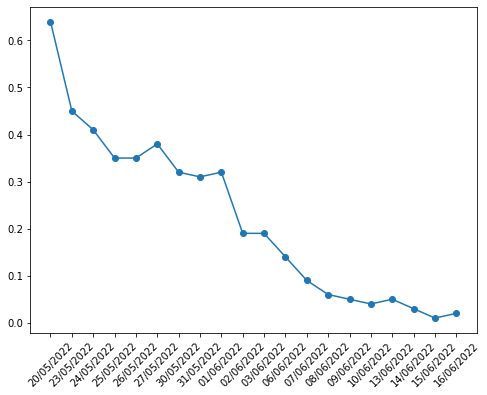

In [6]:
# der['(-20) Put'].plot (figsize=(12,5))
# xaxes='Date'
plt.plot(der.index, der['(-20) Put'], '-o')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=45)

# Value of (-16) put option (Y axis) as time goes by (X axis)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

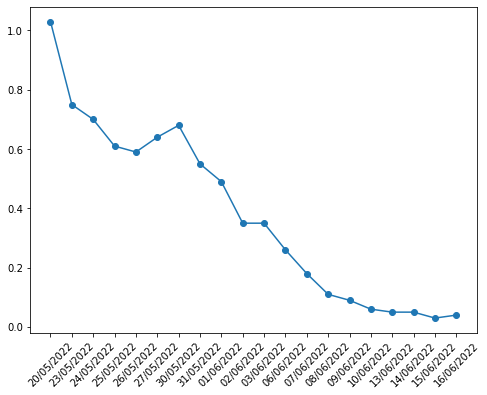

In [6]:
# der['(-16) Put'].plot (figsize=(12,5))
# xaxes='Date'
plt.plot(der.index, der['(-16) Put'], '-o')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=45)

# Value of (-12) put option (Y axis) as time goes by (X axis)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

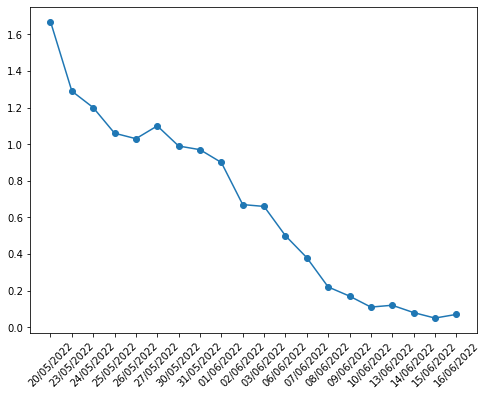

In [7]:
# der['(-12) Put'].plot (figsize=(12,5))
# xaxes='Date'
plt.plot(der.index, der['(-12) Put'], '-o')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=45)

# Value of (-8) put option (Y axis) as time goes by (X axis)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

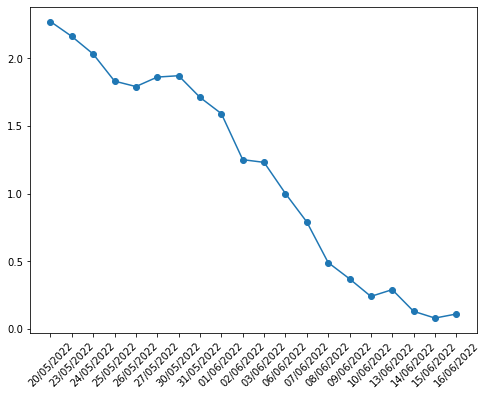

In [8]:
# der['(-8) Put'].plot (figsize=(12,5))
# xaxes='Date'
plt.plot(der.index, der['(-8) Put'], '-o')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=45)

# Value of (-4) put option (Y axis) as time goes by (X axis)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

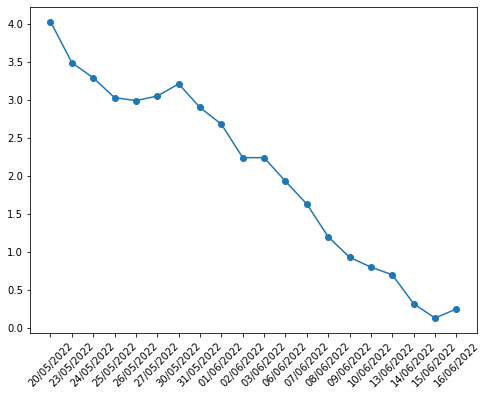

In [9]:
# der['(-4) Put'].plot (figsize=(12,5))
# xaxes='Date'
plt.plot(der.index, der['(-4) Put'], '-o')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=45)

# Value of price put option (Y axis) as time goes by (X axis)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

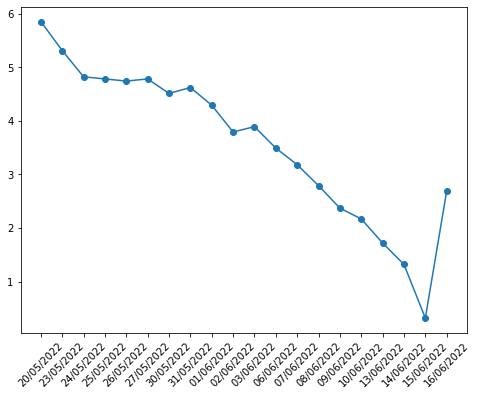

In [10]:
# der['Price Put'].plot (figsize=(12,5))
# xaxes='Date'
plt.plot(der.index, der['Price Put'], '-o')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=45)

# Value of +20 call option (Y axis) as time goes by (X axis)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

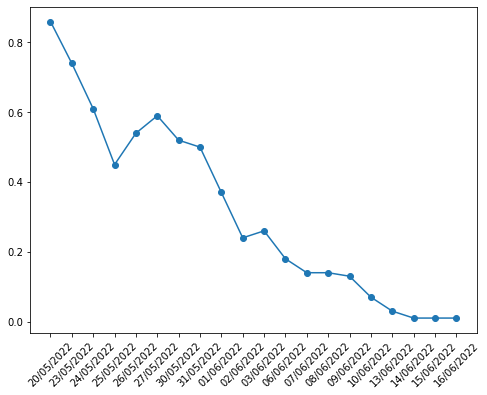

In [11]:
# der['20 Call'].plot (figsize=(12,5))
# xaxes='Date'
plt.plot(der.index, der['20 Call'], '-o')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=45)

# Value of +16 call option (Y axis) as time goes by (X axis)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

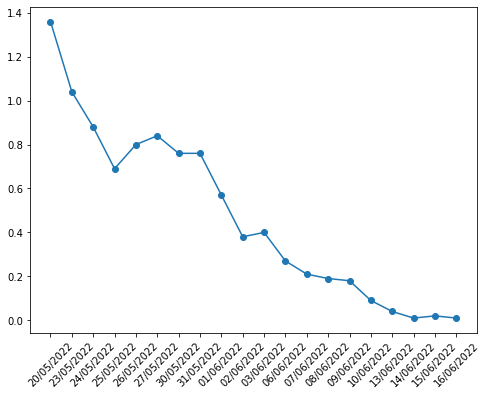

In [12]:
# der['16 Call'].plot (figsize=(12,5))
# xaxes='Date'
plt.plot(der.index, der['16 Call'], '-o')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=45)

# Value of +12 call option (Y axis) as time goes by (X axis)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

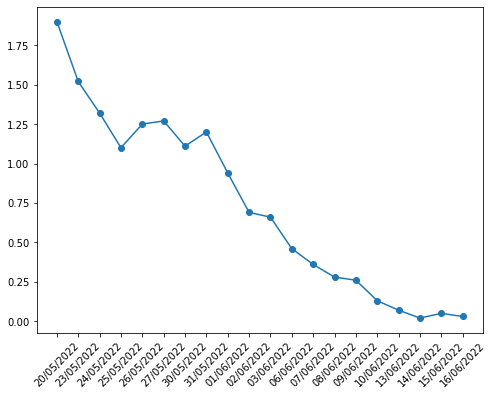

In [13]:
# der['12 Call'].plot (figsize=(12,5))
# xaxes='Date'
plt.plot(der.index, der['12 Call'], '-o')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=45)

# Value of +8 call option (Y axis) as time goes by (X axis)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

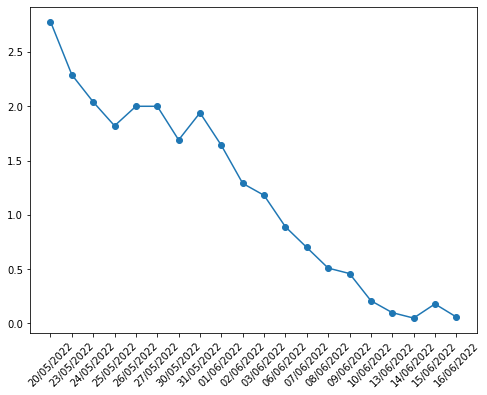

In [14]:
# der['8 Call'].plot (figsize=(12,5))
# xaxes='Date'
plt.plot(der.index, der['8 Call'], '-o')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=45)

# Value of +4 call option (Y axis) as time goes by (X axis)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

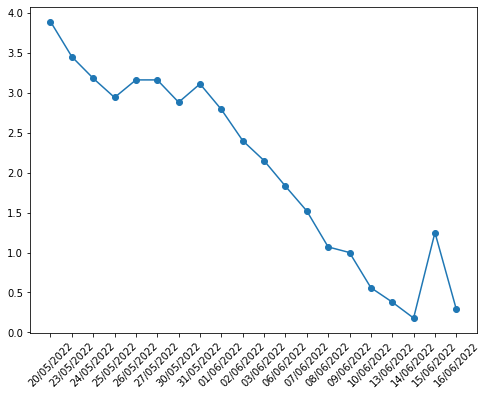

In [15]:
# der['4 Call'].plot (figsize=(12,5))
# xaxes='Date'
plt.plot(der.index, der['4 Call'], '-o')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=45)

# Value of price call option (Y axis) as time goes by (X axis)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

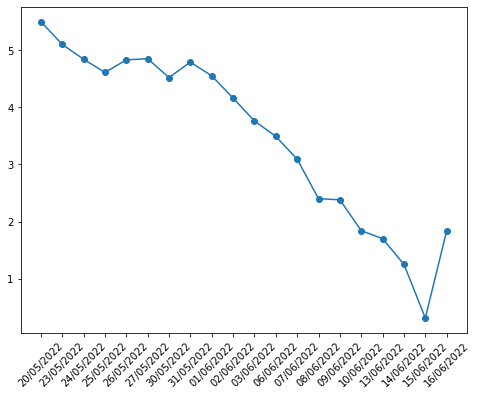

In [16]:
# der['Price Call'].plot (figsize=(12,5))
# xaxes='Date'
plt.plot(der.index, der['Price Call'], '-o')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=45)

When examining the above diagrams of the option prices, we can definately conclude that the ones far from the index price have many similarities, moving in the same direction while having the same pace. Although, by observing the (+-4) options we could notice a small jump in price at (4 Call) option on 15/06/2022 even though the put option remained in the same price range and thats probably because the index price was on a rapid decline the two previous days while expiration date was one day ahead. We can also see that the following day (expiration day), the price put and call options were far more expensive when compared to the previous one. 
In finance, the expiration date of an option contract is the last date on which the holder of the option may exercise it according to its terms. In the case of options with "automatic exercise" the net value of the option is credited to the long and debited to the short position holders.
Typically, exchange-traded option contracts expire according to a pre-determined calendar. For instance, for U.S. exchange-listed equity option contracts, the expiration date is always the Saturday that follows the third Friday of the month, unless that Friday is a market holiday, in which case the expiration is on Thursday right before that Friday.

# III. Drawing the diagram with the values of the options as they are each Friday (closing price)

In [17]:
der_fr=pd.read_csv("der_fridays.csv",index_col=0,header=0)

In [18]:
der_fr

,20/05/2022,27/05/2022,03/06/2022,10/06/2022
(-20),0.64,0.38,0.19,0.04
(-16),1.03,0.64,0.35,0.06
(-12),1.67,1.10,0.66,0.11
(-8),2.27,1.86,1.23,0.24
(-4),4.03,3.05,2.24,0.80
Price Put,5.85,4.78,3.89,2.17
Price Call,5.50,4.85,3.76,1.84
4,3.89,3.16,2.15,0.56
8,2.78,2.00,1.18,0.21
12,1.90,1.27,0.66,0.13


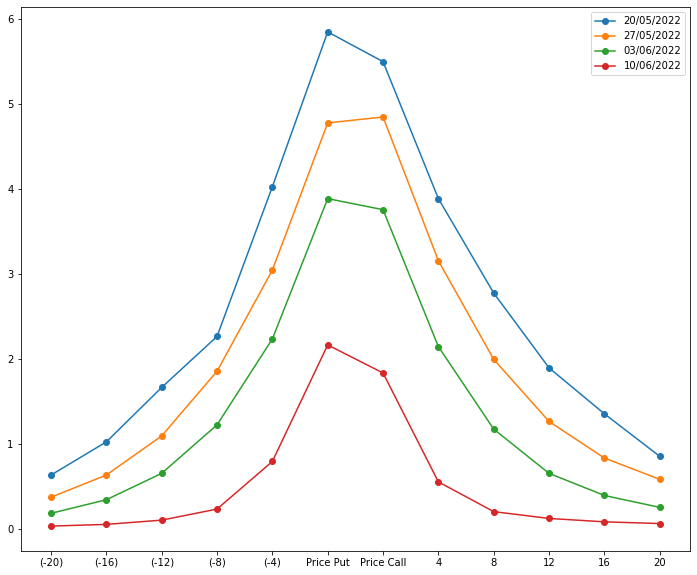

In [67]:
data=der_fr
plt.plot(data,marker='o')
plt.rcParams["figure.figsize"] = (12,10)
plt.xticks(range(0,len(data),1))
plt.gca().legend(('20/05/2022','27/05/2022','03/06/2022','10/06/2022'))

In the diagram above we can observe the values of the options at four given days of each week (Friday). When examining the diagram one could say that it is pretty much what we could expected to see as prices decline every week that is closer to the expiration date. We can see higher prices at options that are closer to the index price and lower prices at the ones that are at a bigger distance. However, overall the prices keep declining with the same pace each week going closer and closer to zero. Moreover, it is pretty interesting to notice that prices of the last week seems to be much lower when compaired to the other three that seems to be closer to each other. That is because this is the last week before the expiration date. Time value decays to zero at expiration, with a general rule that it will lose 1⁄3 of its value during the first half of its life and 2⁄3 in the second half. As an option moves closer to expiry, moving its price requires an increasingly larger move in the price of the underlying security.

# IV. Calculating the mathematical equation of the change in the value of two different options over time. (E.g. the one corresponding to (+-4) distance from the pointer and that at a distance of (+-20).

# Linear Regression

In [20]:
y=der.iloc[0:19,4]
x= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

In [21]:
linreg = LinearRegression()

In [22]:
x= x.reshape(-1,1)

In [23]:
linreg.fit(x,y)

LinearRegression()

In [24]:
y_pred=linreg.predict(x)

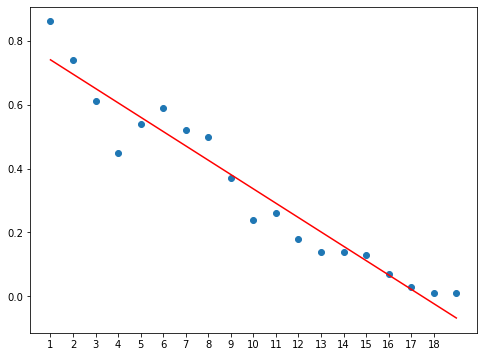

In [65]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(range(1,len(x),1))
plt.show()

In [26]:
print(linreg.coef_)

[-0.20489474]


In [27]:
print(linreg.intercept_)

4.195789473684211


# Y= mx+c => Y= -0.2x + 4.19  (-4 Put option)

In [28]:
y=der.iloc[0:19,7]
x= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

linreg = LinearRegression()
x= x.reshape(-1,1)
linreg.fit(x,y)
y_pred=linreg.predict(x)

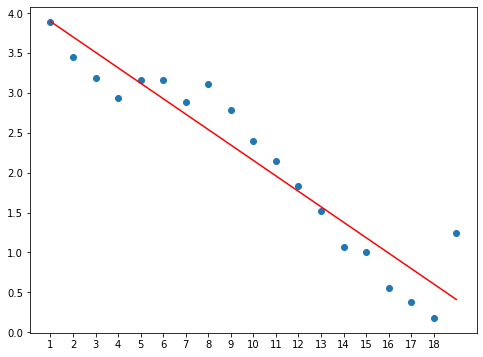

In [29]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(range(1,len(x),1))
plt.show()

In [30]:
print(linreg.coef_)
print(linreg.intercept_)

[-0.19340351]
4.086666666666668


# Y= mx+c => Y= -0.19x + 4.08               (4 Call option)

In [31]:
y=der.iloc[0:19,0]
x= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

linreg = LinearRegression()
x= x.reshape(-1,1)
linreg.fit(x,y)
y_pred=linreg.predict(x)

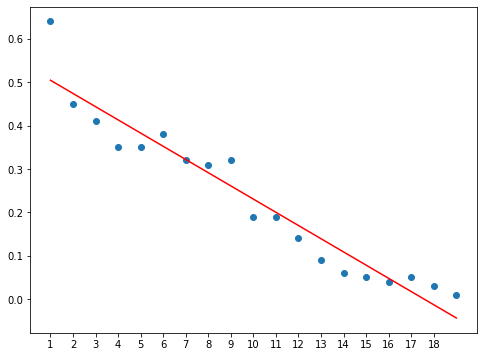

In [32]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(range(1,len(x),1))
plt.show()

In [33]:
print(linreg.coef_)
print(linreg.intercept_)

[-0.0304386]
0.5349122807017545


# Y= mx+c => Y= -0.03+ 0.53 (-20 Put option)

In [34]:
y=der.iloc[0:19,11]
x= np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])

linreg = LinearRegression()
x= x.reshape(-1,1)
linreg.fit(x,y)
y_pred=linreg.predict(x)

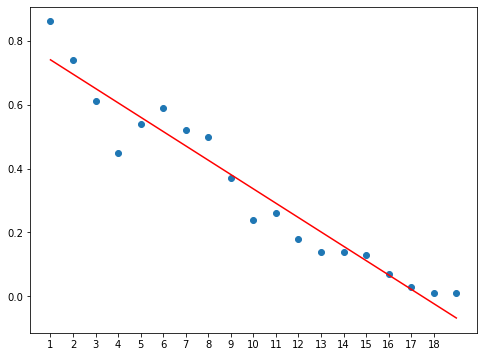

In [35]:
plt.scatter(x,y)
plt.plot(x,y_pred,color='red')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(range(1,len(x),1))
plt.show()

In [36]:
print(linreg.coef_)
print(linreg.intercept_)

[-0.04485965]
0.7849122807017543


# Y= mx+c => Y= -0.04+ 0.78 (20 Call option)

In statistics, linear regression is a linear approach for modelling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression; for more than one, the process is called multiple linear regression.
This term is distinct from multivariate linear regression, where multiple correlated dependent variables are predicted, rather than a single scalar variable.

In linear regression, the relationships are modeled using linear predictor functions whose unknown model parameters are estimated from the data. Such models are called linear models. Most commonly, the conditional mean of the response given the values of the explanatory variables (or predictors) is assumed to be an affine function of those values; less commonly, the conditional median or some other quantile is used. Like all forms of regression analysis, linear regression focuses on the conditional probability distribution of the response given the values of the predictors, rather than on the joint probability distribution of all of these variables, which is the domain of multivariate analysis.

In our case we use linear regression in order to estimate the coefficients and intercepts in order to establish our functions for each option given.
By observing each function one could easily see that the (+-4) option's coefficient and intercept are very close while (+-20) option's are very close too. However if we compare the (+-4) and (+-20) option's coefficients and intercepts we could notice that the numbers have a lot of distance between them. Of course in all four cases (m) has a negative sign that indicates a bearish pattern.

The rate of change is most often used to measure the change in a security's price over time. This is also known as the price rate of change (ROC). The price rate of change can be derived by taking the price of a security at time B minus the price of the same security at time A and dividing that result by the price at time A.

\begin{aligned} &\text{Price ROC} = \frac{B - A}{A} \times 100 \\ &\textbf{where:}\\ &B=\text{price at current time}\\ &A=\text{price at previous time}\\ \end{aligned} 
​
  
<!-- Price ROC= 
A
B−A
​
 ×100
where:
B=price at current time
A=price at previous time
​ -->


The rate of change (ROC) is the speed at which a variable changes over a specific period of time. ROC is often used when speaking about momentum, and it can generally be expressed as a ratio between a change in one variable relative to a corresponding change in another; graphically, the rate of change is represented by the slope of a line. Rate of change is used to mathematically describe the percentage change in value over a defined period of time, and it represents the momentum of a variable. The calculation for ROC is simple in that it takes the current value of a stock or index and divides it by the value from an earlier period. Subtract one and multiply the resulting number by 100 to give it a percentage representation.

ROC = ({{current value}/{previous value}} - 1)*100

In [37]:
ROC=(((der-der.shift(1))/der.shift(1))*100).dropna()
print('RATE OF CHANGE in %'),ROC.shape
ROC

RATE OF CHANGE in %


,(-20) Put,(-16) Put,(-12) Put,(-8) Put,(-4) Put,Price Put,Price Call,4 Call,8 Call,12 Call,16 Call,20 Call,Closing Oil Price
Date,,,,,,,,,,,,,
23/05/2022,-29.687500,-27.184466,-22.754491,-4.845815,-13.399504,-9.230769,-7.272727,-11.311054,-17.625899,-20.000000,-23.529412,-13.953488,-0.190045
24/05/2022,-8.888889,-6.666667,-6.976744,-6.018519,-5.730659,-9.227872,-5.098039,-7.826087,-10.917031,-13.157895,-15.384615,-17.567568,-0.262943
25/05/2022,-14.634146,-12.857143,-11.666667,-9.852217,-7.902736,-0.829876,-4.752066,-7.547170,-10.784314,-16.666667,-21.590909,-26.229508,0.454545
26/05/2022,0.000000,-3.278689,-2.830189,-2.185792,-1.320132,-0.836820,4.772234,7.482993,9.890110,13.636364,15.942029,20.000000,3.167421
27/05/2022,8.571429,8.474576,6.796117,3.910615,2.006689,0.843882,0.414079,0.000000,0.000000,1.600000,5.000000,9.259259,0.938596
30/05/2022,-15.789474,6.250000,-10.000000,0.537634,5.245902,-5.648536,-6.804124,-8.860759,-15.500000,-12.598425,-9.523810,-11.864407,1.677240
31/05/2022,-3.125000,-19.117647,-2.020202,-8.556150,-9.657321,2.439024,5.973451,7.986111,14.792899,8.108108,0.000000,-3.846154,-1.991453
01/06/2022,3.225806,-10.909091,-7.216495,-7.017544,-7.586207,-7.142857,-5.010438,-10.289389,-15.463918,-21.666667,-25.000000,-26.000000,0.287782
02/06/2022,-40.625000,-28.571429,-25.555556,-21.383648,-16.417910,-11.655012,-8.571429,-13.978495,-21.341463,-26.595745,-33.333333,-35.135135,1.304348


In [38]:
# ROC.iloc[0:19,4],ROC.iloc[0:19,7],ROC.iloc[0:19,0],ROC.iloc[0:19,11]
# ή
ROC['(-4) Put'],ROC['4 Call'],ROC['(-20) Put'], ROC['20 Call']

(Date
 23/05/2022   -13.399504
 24/05/2022    -5.730659
 25/05/2022    -7.902736
 26/05/2022    -1.320132
 27/05/2022     2.006689
 30/05/2022     5.245902
 31/05/2022    -9.657321
 01/06/2022    -7.586207
 02/06/2022   -16.417910
 03/06/2022     0.000000
 06/06/2022   -13.839286
 07/06/2022   -15.544041
 08/06/2022   -26.380368
 09/06/2022   -22.500000
 10/06/2022   -13.978495
 13/06/2022   -12.500000
 14/06/2022   -54.285714
 15/06/2022   -59.375000
 16/06/2022    92.307692
 Name: (-4) Put, dtype: float64,
 Date
 23/05/2022    -11.311054
 24/05/2022     -7.826087
 25/05/2022     -7.547170
 26/05/2022      7.482993
 27/05/2022      0.000000
 30/05/2022     -8.860759
 31/05/2022      7.986111
 01/06/2022    -10.289389
 02/06/2022    -13.978495
 03/06/2022    -10.416667
 06/06/2022    -14.883721
 07/06/2022    -16.939891
 08/06/2022    -29.605263
 09/06/2022     -6.542056
 10/06/2022    -44.000000
 13/06/2022    -32.142857
 14/06/2022    -52.631579
 15/06/2022    594.444444
 16/06/2022 

# Making the diagrams of the rate of change of the value of the (+-4) and (+-20) Options as a function of index change

(-4) PUT OPTION


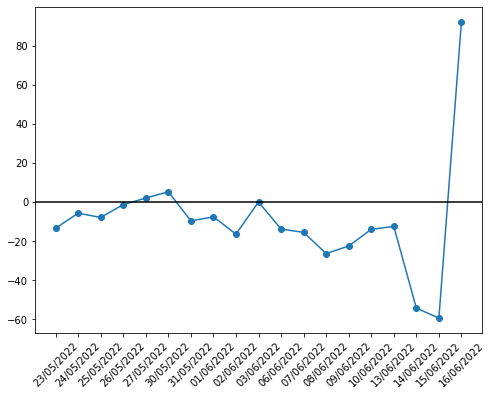

In [39]:
max_d=0
plt.plot(ROC['(-4) Put'], '-o')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=45)
plt.axhline(y=max_d, c='k')
print ('(-4) PUT OPTION')

By examining the above diagram of the rate of change of the value of (-4) Put option we can see that it moves much more steadily in the first three weeks relative to the ending prices in which we notice a big move downwards close to 60% for two consecutive days and a big move to the upside over 90% in value at the last day.

4 CALL OPTION


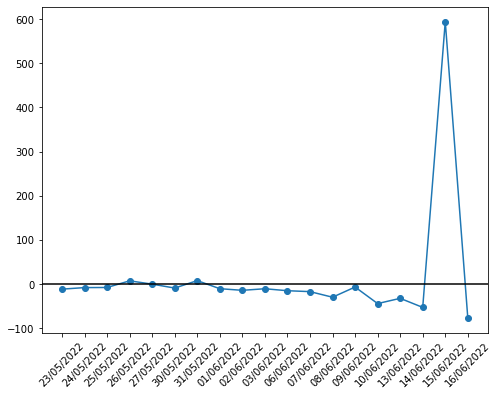

In [40]:
max_d=0
plt.plot(ROC['4 Call'], '-o')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=45)
plt.axhline(y=max_d, c='k')
print('4 CALL OPTION')

By examining the above diagram of the rate of change of the value of 4 Call option we can see that it it slowly declines in price action as the time goes by. Even though we can observe a bearish move on 14/06/2022 close to 50%, a surprising bullish move takes place the next day at almost 600%. Finally, the last day before expiration the price has lost almost 80% of its value. 

(-20) PUT OPTION


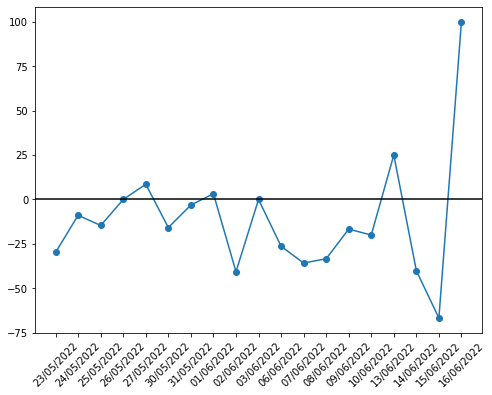

In [41]:
max_d=0
plt.plot(ROC['(-20) Put'], '-o')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=45)
plt.axhline(y=max_d, c='k')
print('(-20) PUT OPTION')

By examining the above diagram of the rate of change of the value of (-20) Put option we can see that it fluctuates alot compared to options closer to the index price. We can observe some bullish moves throughout the time but the bearish ones are way more significant as we can see the price has bearish moves from 25% to almost 75% on 15/06/2022.
Surprisingly, we can see a double up at the last day before expiration from the chart above but if we see the actual prices that is a change from 0.01 to 0.02 .

20 CALL OPTION


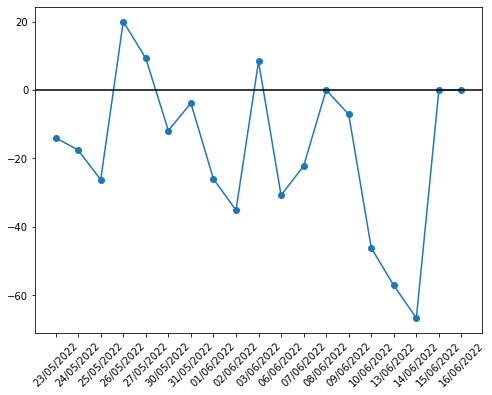

In [42]:
max_d=0
plt.plot(ROC['20 Call'], '-o')
plt.rcParams["figure.figsize"] = (8,6)
plt.xticks(rotation=45)
print('20 CALL OPTION')
plt.axhline(y=max_d, c='k')

By examining the above diagram of the rate of change of the value of 20 Call option we can see that it has way more significant bearish and bullish moves compared to the (-20) Put option. That is probably due to the index price action and the uncertainty of the market at the time with many predicting way higher prices for oil.

# V. Estimating the diagrams of the rate of change of the value of the Option (Those who are within ±4 of the pointer as well as those that are at a distance ±20) as a function of index change.

# CUBIC SPLINE INTERPOLATION 

In [43]:
data = pd.read_excel('cln22.xlsx', header= 0, index_col= None)
x_lbl = 'Date'
y_lbl = 'Option Price'
data['Date'] = data['Date'].dt.strftime('%d/%m')
data = data.set_index('Date')
Y1 = data['Put -20'].to_numpy()
Y2 = data['Put -4'].to_numpy()
Y3 = data['Call 4'].to_numpy()
Y4 = data['Call 20'].to_numpy()
N = len(Y1)
X = range(N)

# INTERPOLATION

In [44]:
x_new = np.linspace(0, N, 100)

f1 = interpolate.CubicSpline(X, Y1, bc_type= 'natural')
y1_fit = f1(x_new)

f2 = interpolate.CubicSpline(X, Y2, bc_type= 'natural')
y2_fit = f2(x_new)

f3 = interpolate.CubicSpline(X, Y3, bc_type= 'natural')
y3_fit = f3(x_new)

f4 = interpolate.CubicSpline(X, Y4, bc_type= 'natural')
y4_fit = f4(x_new)

# PLOTS

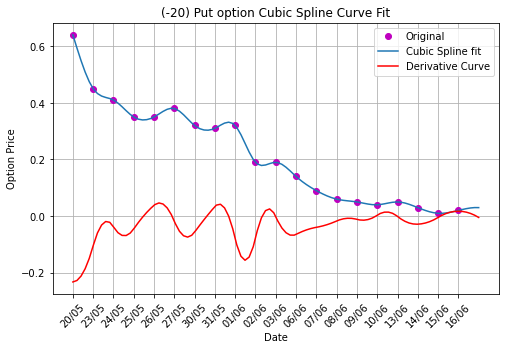

In [45]:
plt.figure(figsize= (8,5))
x_ticks = data.index.to_list()
tit = '(-20) Put option Cubic Spline Curve Fit'
plt.plot(X, Y1, 'mo', label= 'Original')
plt.plot(x_new, y1_fit,label= 'Cubic Spline fit')
plt.plot(x_new, f1(x_new, 1),'red',label= 'Derivative Curve') 
plt.legend()
plt.grid()
plt.ylabel(y_lbl)
plt.xlabel('Date')
plt.xticks(ticks= X, labels= x_ticks, rotation = 45)
plt.title(tit)
bbox_inches= 'tight'
plt.show()

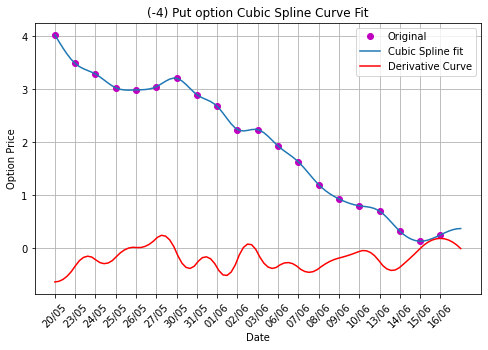

In [46]:
plt.figure(figsize= (8,5))
x_ticks = data.index.to_list()
tit = '(-4) Put option Cubic Spline Curve Fit'
plt.plot(X, Y2, 'mo', label= 'Original')
plt.plot(x_new, y2_fit, label= 'Cubic Spline fit')
plt.plot(x_new, f2(x_new, 1),'red', label= 'Derivative Curve')
plt.legend()
plt.grid()
plt.ylabel(y_lbl)
plt.xlabel('Date')
plt.xticks(ticks= X, labels= x_ticks, rotation = 45)
plt.title(tit)
bbox_inches= 'tight'
plt.show()

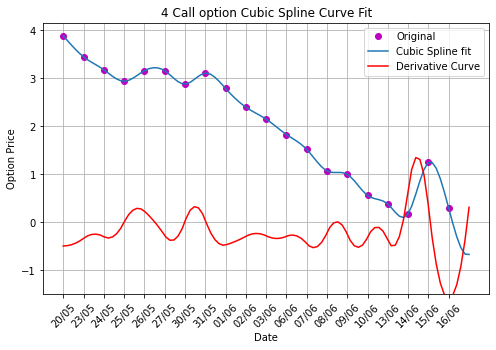

In [47]:
plt.figure(figsize= (8,5))
x_ticks = data.index.to_list()
tit = '4 Call option Cubic Spline Curve Fit'
plt.plot(X, Y3, 'mo', label= 'Original')
plt.plot(x_new, y3_fit, label= 'Cubic Spline fit')
plt.plot(x_new, f3(x_new, 1),'red', label= 'Derivative Curve')
plt.legend()
plt.grid()
plt.ylabel(y_lbl)
plt.xlabel('Date')
plt.xticks(ticks= X, labels= x_ticks, rotation = 45)
plt.title(tit)
plt.ylim(bottom=-1.5)
plt.show()

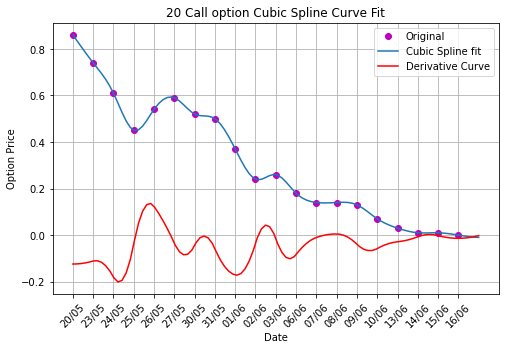

In [48]:
plt.figure(figsize= (8,5))
x_ticks = data.index.to_list()
tit = '20 Call option Cubic Spline Curve Fit'
plt.plot(X, Y4, 'mo', label= 'Original')
plt.plot(x_new, y4_fit, label= 'Cubic Spline fit')
plt.plot(x_new, f4(x_new, 1),'red', label= 'Derivative Curve')
plt.legend()
plt.grid()
plt.ylabel(y_lbl)
plt.xlabel('Date')
plt.xticks(ticks= X, labels= x_ticks, rotation = 45)
plt.title(tit)
plt.show()

In the mathematical field of numerical analysis, spline interpolation is a form of interpolation where the interpolant is a special type of piecewise polynomial called a spline. That is, instead of fitting a single, high-degree polynomial to all of the values at once, spline interpolation fits low-degree polynomials to small subsets of the values, for example, fitting nine cubic polynomials between each of the pairs of ten points, instead of fitting a single degree-ten polynomial to all of them. 

Spline interpolation is often preferred over polynomial interpolation because the interpolation error can be made small even when using low-degree polynomials for the spline. Spline interpolation also avoids the problem of Runge's phenomenon, in which oscillation can occur between points when interpolating using high-degree polynomials.

Cubic spline interpolation is a way of finding a curve that connects data points with a degree of three or less. Splines are polynomial that are smooth and continuous across a given plot and also continuous first and second derivatives where they join.

# VI. Calculating the first differences in the value of the options and plotting the time series for the period examined for (+-4) and (+-20) options

In [49]:
type(der_fr)

pandas.core.frame.DataFrame

In [50]:
diff_log=np.log(der/der.shift(1)).dropna()
diff_log

,(-20) Put,(-16) Put,(-12) Put,(-8) Put,(-4) Put,Price Put,Price Call,4 Call,8 Call,12 Call,16 Call,20 Call,Closing Oil Price
Date,,,,,,,,,,,,,
23/05/2022,-0.352221,-0.317241,-0.258181,-0.049672,-0.143865,-0.096850,-0.075508,-0.120035,-0.193899,-0.223144,-0.268264,-0.150282,-0.001902
24/05/2022,-0.093090,-0.068993,-0.072321,-0.062072,-0.059014,-0.096818,-0.052326,-0.081493,-0.115602,-0.141079,-0.167054,-0.193191,-0.002633
25/05/2022,-0.158224,-0.137621,-0.124053,-0.103720,-0.082325,-0.008333,-0.048687,-0.078472,-0.114113,-0.182322,-0.243230,-0.304211,0.004535
26/05/2022,0.000000,-0.033336,-0.028710,-0.022100,-0.013289,-0.008403,0.046619,0.072162,0.094311,0.127833,0.147920,0.182322,0.031183
27/05/2022,0.082238,0.081346,0.065751,0.038361,0.019868,0.008403,0.004132,0.000000,0.000000,0.015873,0.048790,0.088553,0.009342
30/05/2022,-0.171850,0.060625,-0.105361,0.005362,0.051129,-0.058143,-0.070467,-0.092782,-0.168419,-0.134657,-0.100083,-0.126294,0.016633
31/05/2022,-0.031749,-0.212175,-0.020409,-0.089445,-0.101560,0.024098,0.058018,0.076832,0.137959,0.077962,0.000000,-0.039221,-0.020115
01/06/2022,0.031749,-0.115513,-0.074901,-0.072759,-0.078894,-0.074108,-0.051403,-0.108581,-0.167992,-0.244197,-0.287682,-0.301105,0.002874
02/06/2022,-0.521297,-0.336472,-0.295117,-0.240590,-0.179341,-0.123921,-0.089612,-0.150573,-0.240054,-0.309188,-0.405465,-0.432864,0.012959


# Plotting logarithmic returns for (-4) Put option

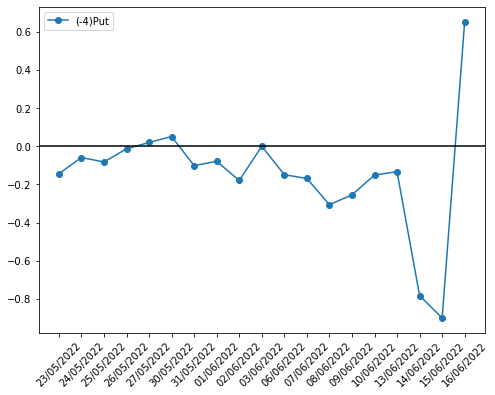

In [51]:
max_d=0
plt.plot(diff_log.iloc[0:19,4],marker='o',label='(-4)Put')
plt.rcParams["figure.figsize"] = (10,5)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.axhline(y=max_d, c='k')

#  Plotting logarithmic returns for 4 Call option

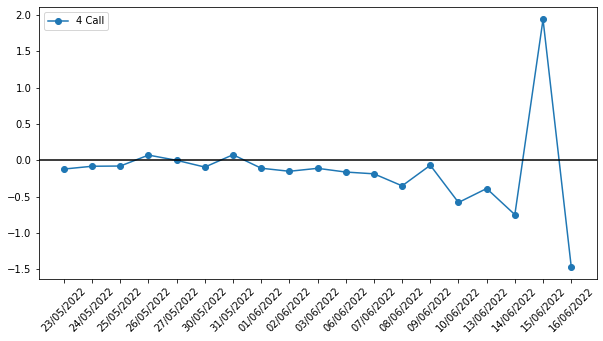

In [52]:
max_d=0
diff_log.iloc[0:19,7]
plt.plot(diff_log.iloc[0:19,7],marker='o',label='4 Call')
plt.rcParams["figure.figsize"] = (10,5)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.axhline(y=max_d, c='k')

#  Plotting logarithmic returns for (-20) Put option


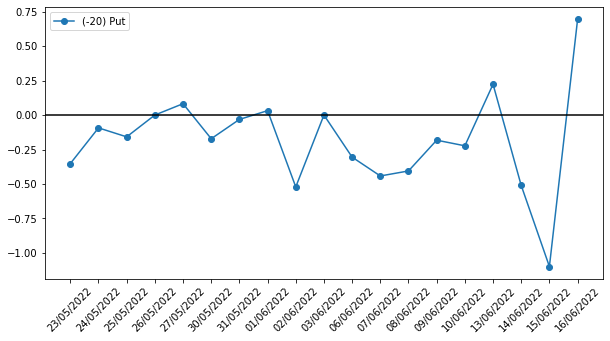

In [53]:
diff_log.iloc[0:19,0]
plt.plot(diff_log.iloc[0:19,0],marker='o',label='(-20) Put')
plt.rcParams["figure.figsize"] = (10,5)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.axhline(y=0, c='k')

# Plotting logarithmic returns for 20 Call option


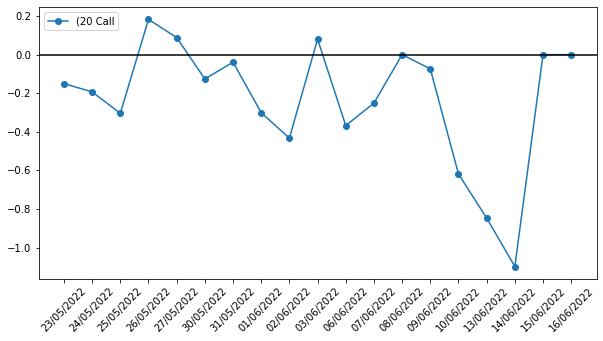

In [54]:
diff_log.iloc[0:19,11]
plt.plot(diff_log.iloc[0:19,11],marker='o',label='(20 Call')
plt.rcParams["figure.figsize"] = (10,5)
plt.legend(loc='upper left')
plt.xticks(rotation=45)
plt.axhline(y=0, c='k')

Volatility is one of the most important concepts for options traders to understand for two reasons. First, it shows how volatile the market might be in the future. Second, volatility can help you calculate probability. This is a critical component of options trading which may be helpful when trying to determine the likelihood of a stock reaching a specific price by a certain time.
While examining the diagrams above we can see that (-+4) options are way more stable relative to the (-+20) options, with the second having way bigger volatility throughout the time. One can still observe that all four diagrams have high volatility during the last week that we are getting closer to the expiration date with big bearish and bullish moves. 

# VII. For the above time series, we establish a statistical distribution of the log returns while we calculate the mean value of each one of them. In addition, we calculate the confidence intervals 5% of each one

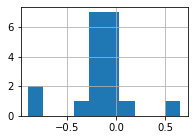

Calculating the mean value of (-4)Put -0.1463189861620254


In [63]:
diff_log.iloc[0:19,4].hist()
plt.show()
plt.rcParams["figure.figsize"] = (3,2)
diff_log.iloc[0:19,4].mean
print('Calculating the mean value of (-4)Put',diff_log.iloc[0:19,4].mean())

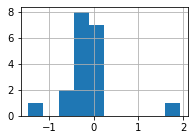

Calculating the mean value of 4 Call -0.13664650071747222


In [56]:
diff_log.iloc[0:19,7].hist()
plt.show()
plt.rcParams["figure.figsize"] = (3,2)
diff_log.iloc[0:19,7].mean
print('Calculating the mean value of 4 Call',diff_log.iloc[0:19,7].mean())

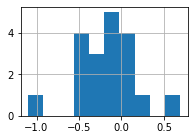

Calculating the mean value of (-20) Put -0.182407152778933


In [57]:
diff_log.iloc[0:19,0].hist()
plt.show()
plt.rcParams["figure.figsize"] = (3,2)
diff_log.iloc[0:19,0].mean
print('Calculating the mean value of (-20) Put',diff_log.iloc[0:19,0].mean())

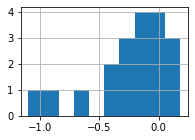

Calculating the mean value of 20 Call -0.23443933138176354


In [58]:
diff_log.iloc[0:19,11].hist()
plt.show()
plt.rcParams["figure.figsize"] = (3,2)
diff_log.iloc[0:19,11].mean
print('Calculating the mean value of 20 Call',diff_log.iloc[0:19,11].mean())

In [59]:
m=diff_log.iloc[0:19,4].mean()
s=diff_log.iloc[0:19,4].std()
dof=len(diff_log.iloc[0:19,4])-1
confidence=0.95

t_crit = np.abs(t.ppf((1-confidence)/2,dof))
(m-s*t_crit/np.sqrt(len(diff_log.iloc[0:19,4])), m+s*t_crit/np.sqrt(len(diff_log.iloc[0:19,4])))

(-0.2977936235704274, 0.005155651246376569)

Calculating the confidence interval for (-4) Put log returns we could say that, with 95% confidence,the expected value lies between -0.29 and 0.005

In [60]:
m=diff_log.iloc[0:19,7].mean()
s=diff_log.iloc[0:19,7].std()
dof=len(diff_log.iloc[0:19,7])-1
confidence=0.95
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
(m-s*t_crit/np.sqrt(len(diff_log.iloc[0:19,7])), m+s*t_crit/np.sqrt(len(diff_log.iloc[0:19,7])))

(-0.4342396841226537, 0.16094668268770926)

Calculating the confidence interval for 4 Call log returns we could say that, with 95% confidence,the expected value lies between -0.43 and 0.16

In [61]:
m=diff_log.iloc[0:19,0].mean()
s=diff_log.iloc[0:19,0].std()
dof=len(diff_log.iloc[0:19,0])-1
confidence=0.95
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
(m-s*t_crit/np.sqrt(len(diff_log.iloc[0:19,0])), m+s*t_crit/np.sqrt(len(diff_log.iloc[0:19,0])))

(-0.35728835314269963, -0.007525952415166348)

Calculating the confidence interval for (-20) Put log returns we could say that, with 95% confidence,the expected value lies between -0.35 and -0.007

In [62]:
m=diff_log.iloc[0:19,11].mean()
s=diff_log.iloc[0:19,11].std()
dof=len(diff_log.iloc[0:19,11])-1
confidence=0.95
t_crit = np.abs(t.ppf((1-confidence)/2,dof))
(m-s*t_crit/np.sqrt(len(diff_log.iloc[0:19,11])), m+s*t_crit/np.sqrt(len(diff_log.iloc[0:19,11])))

(-0.39361332083086975, -0.07526534193265733)

Calculating the confidence interval for 20 Call log returns we could say that, with 95% confidence,the expected value lies between -0.39 and -0.07